In [1]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML
from matplotlib import animation
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [2]:
def angle_generator(angle):
    R = np.zeros(shape=(2,2))
    theta = np.radians(angle)
    c, s = np.cos(theta), np.sin(theta)
    R[0,0] = c
    R[0,1] = -s
    R[1,0] = s
    R[1,1] = c
    return R

def array_rotator(array, angle):
    rotated_array = np.empty(array.shape)
    R = angle_generator(angle)
    for i in range(len(array)):
        rotated_array[i, :] =  np.dot(R, array[i,:])  
    
    return rotated_array 

In [3]:
z_test_tsne_track_31_sam = np.load("../compressed_data/Big_SAM_Interp_For_UM_2D_PCA_Latent_Space__4503.npy", mmap_mode="r")
z_test_tsne_track_31_sam_origin = np.load('../compressed_data/Big_SPCAM_Interp_For_UM_2D_PCA_Latent_Space__4503.npy', mmap_mode="r")
z_test_tsne_track_31_IFS = np.load('../compressed_data/Big_IFS_Interp_For_UM_2D_PCA_Latent_Space__4503.npy', mmap_mode="r")
z_test_tsne_track_31_NICAM = np.load('../compressed_data/Big_NICAM_Interp_For_UM_2D_PCA_Latent_Space__4503.npy', mmap_mode="r")
z_test_tsne_track_31_SHIELD = np.load('../compressed_data/Big_SHIELD_Interp_For_UM_2D_PCA_Latent_Space__4503.npy')
z_test_tsne_track_31_ICON = np.load("../compressed_data/Big_ICON_Interp_For_UM_2D_PCA_Latent_Space__4503.npy", mmap_mode="r")
z_test_tsne_track_31_ARPEGE = np.load("../compressed_data/Big_ARPEGE_Interp_For_UM_2D_PCA_Latent_Space__4503.npy", mmap_mode="r")
z_test_tsne_track_31_GEM = np.load('../compressed_data/Big_GEM_Interp_For_UM_2D_PCA_Latent_Space__4503.npy')
z_test_tsne_track_31_UM = np.load('../compressed_data/Big_UM_2D_PCA_Latent_Space__4503.npy')

In [4]:
max_corr = 117
z_test_tsne_track_31_sam  = array_rotator(z_test_tsne_track_31_sam , max_corr)
z_test_tsne_track_31_sam_origin  = array_rotator(z_test_tsne_track_31_sam_origin , max_corr)
z_test_tsne_track_31_IFS  = array_rotator(z_test_tsne_track_31_IFS , max_corr)
z_test_tsne_track_31_NICAM  = array_rotator(z_test_tsne_track_31_NICAM , max_corr)
z_test_tsne_track_31_SHIELD  = array_rotator(z_test_tsne_track_31_SHIELD , max_corr)
z_test_tsne_track_31_ICON  = array_rotator(z_test_tsne_track_31_ICON , max_corr)
z_test_tsne_track_31_ARPEGE  = array_rotator(z_test_tsne_track_31_ARPEGE , max_corr)
z_test_tsne_track_31_GEM  = array_rotator(z_test_tsne_track_31_GEM , max_corr)
z_test_tsne_track_31_UM  = array_rotator(z_test_tsne_track_31_UM , max_corr)

In [5]:
labels_3_original = np.load("../compressed_data/Scaled_Mandt_Method_Small_SPCAM_To_UM_Interp_Labels_4503_Z_3.npy").astype(int)
labels_3_SAM = np.load("../compressed_data/Scaled_Mandt_Method_Small_SAM_To_UM_Interp_Labels_4503_Z_3.npy").astype(int)
labels_3_UM = np.load("../compressed_data/Small_UM_Labels_4503_Z_3.npy").astype(int)
labels_3_SHIELD = np.load("../compressed_data/Scaled_Mandt_Method_Small_SHIELD_To_UM_Interp_Labels_4503_Z_3.npy").astype(int)
labels_3_ICON = np.load("../compressed_data/Scaled_Mandt_Method_Small_ICON_To_UM_Interp_Labels_4503_Z_3.npy").astype(int)
labels_3_ARPEGE = np.load("../compressed_data/Scaled_Mandt_Method_Small_ARPEGE_To_UM_Interp_Labels_4503_Z_3.npy").astype(int)
labels_3_NICAM = np.load("../compressed_data/Scaled_Mandt_Method_Small_NICAM_To_UM_Interp_Labels_4503_Z_3.npy").astype(int)
labels_3_GEM = np.load("../compressed_data/Scaled_Mandt_Method_Small_GEM_To_UM_Interp_Labels_4503_Z_3.npy").astype(int)
labels_3_IFS = np.load("../compressed_data/Scaled_Mandt_Method_Small_IFS_To_UM_Interp_Labels_4503_Z_3.npy").astype(int)

In [6]:
W_500_w_test_SAM = np.load("../compressed_data/4802_tke_UM.npy")
EQ_1_ww_test_SAM_profile = np.load("../compressed_data/4802_EQ_1_ww_test_UM_profile.npy")
ifs_land_frac = np.load("../compressed_data/Figure_2_UM_LAND_FRAC.npy")

# Plot

In [7]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw
plt.rc('hatch', color='k', linewidth=1.5)

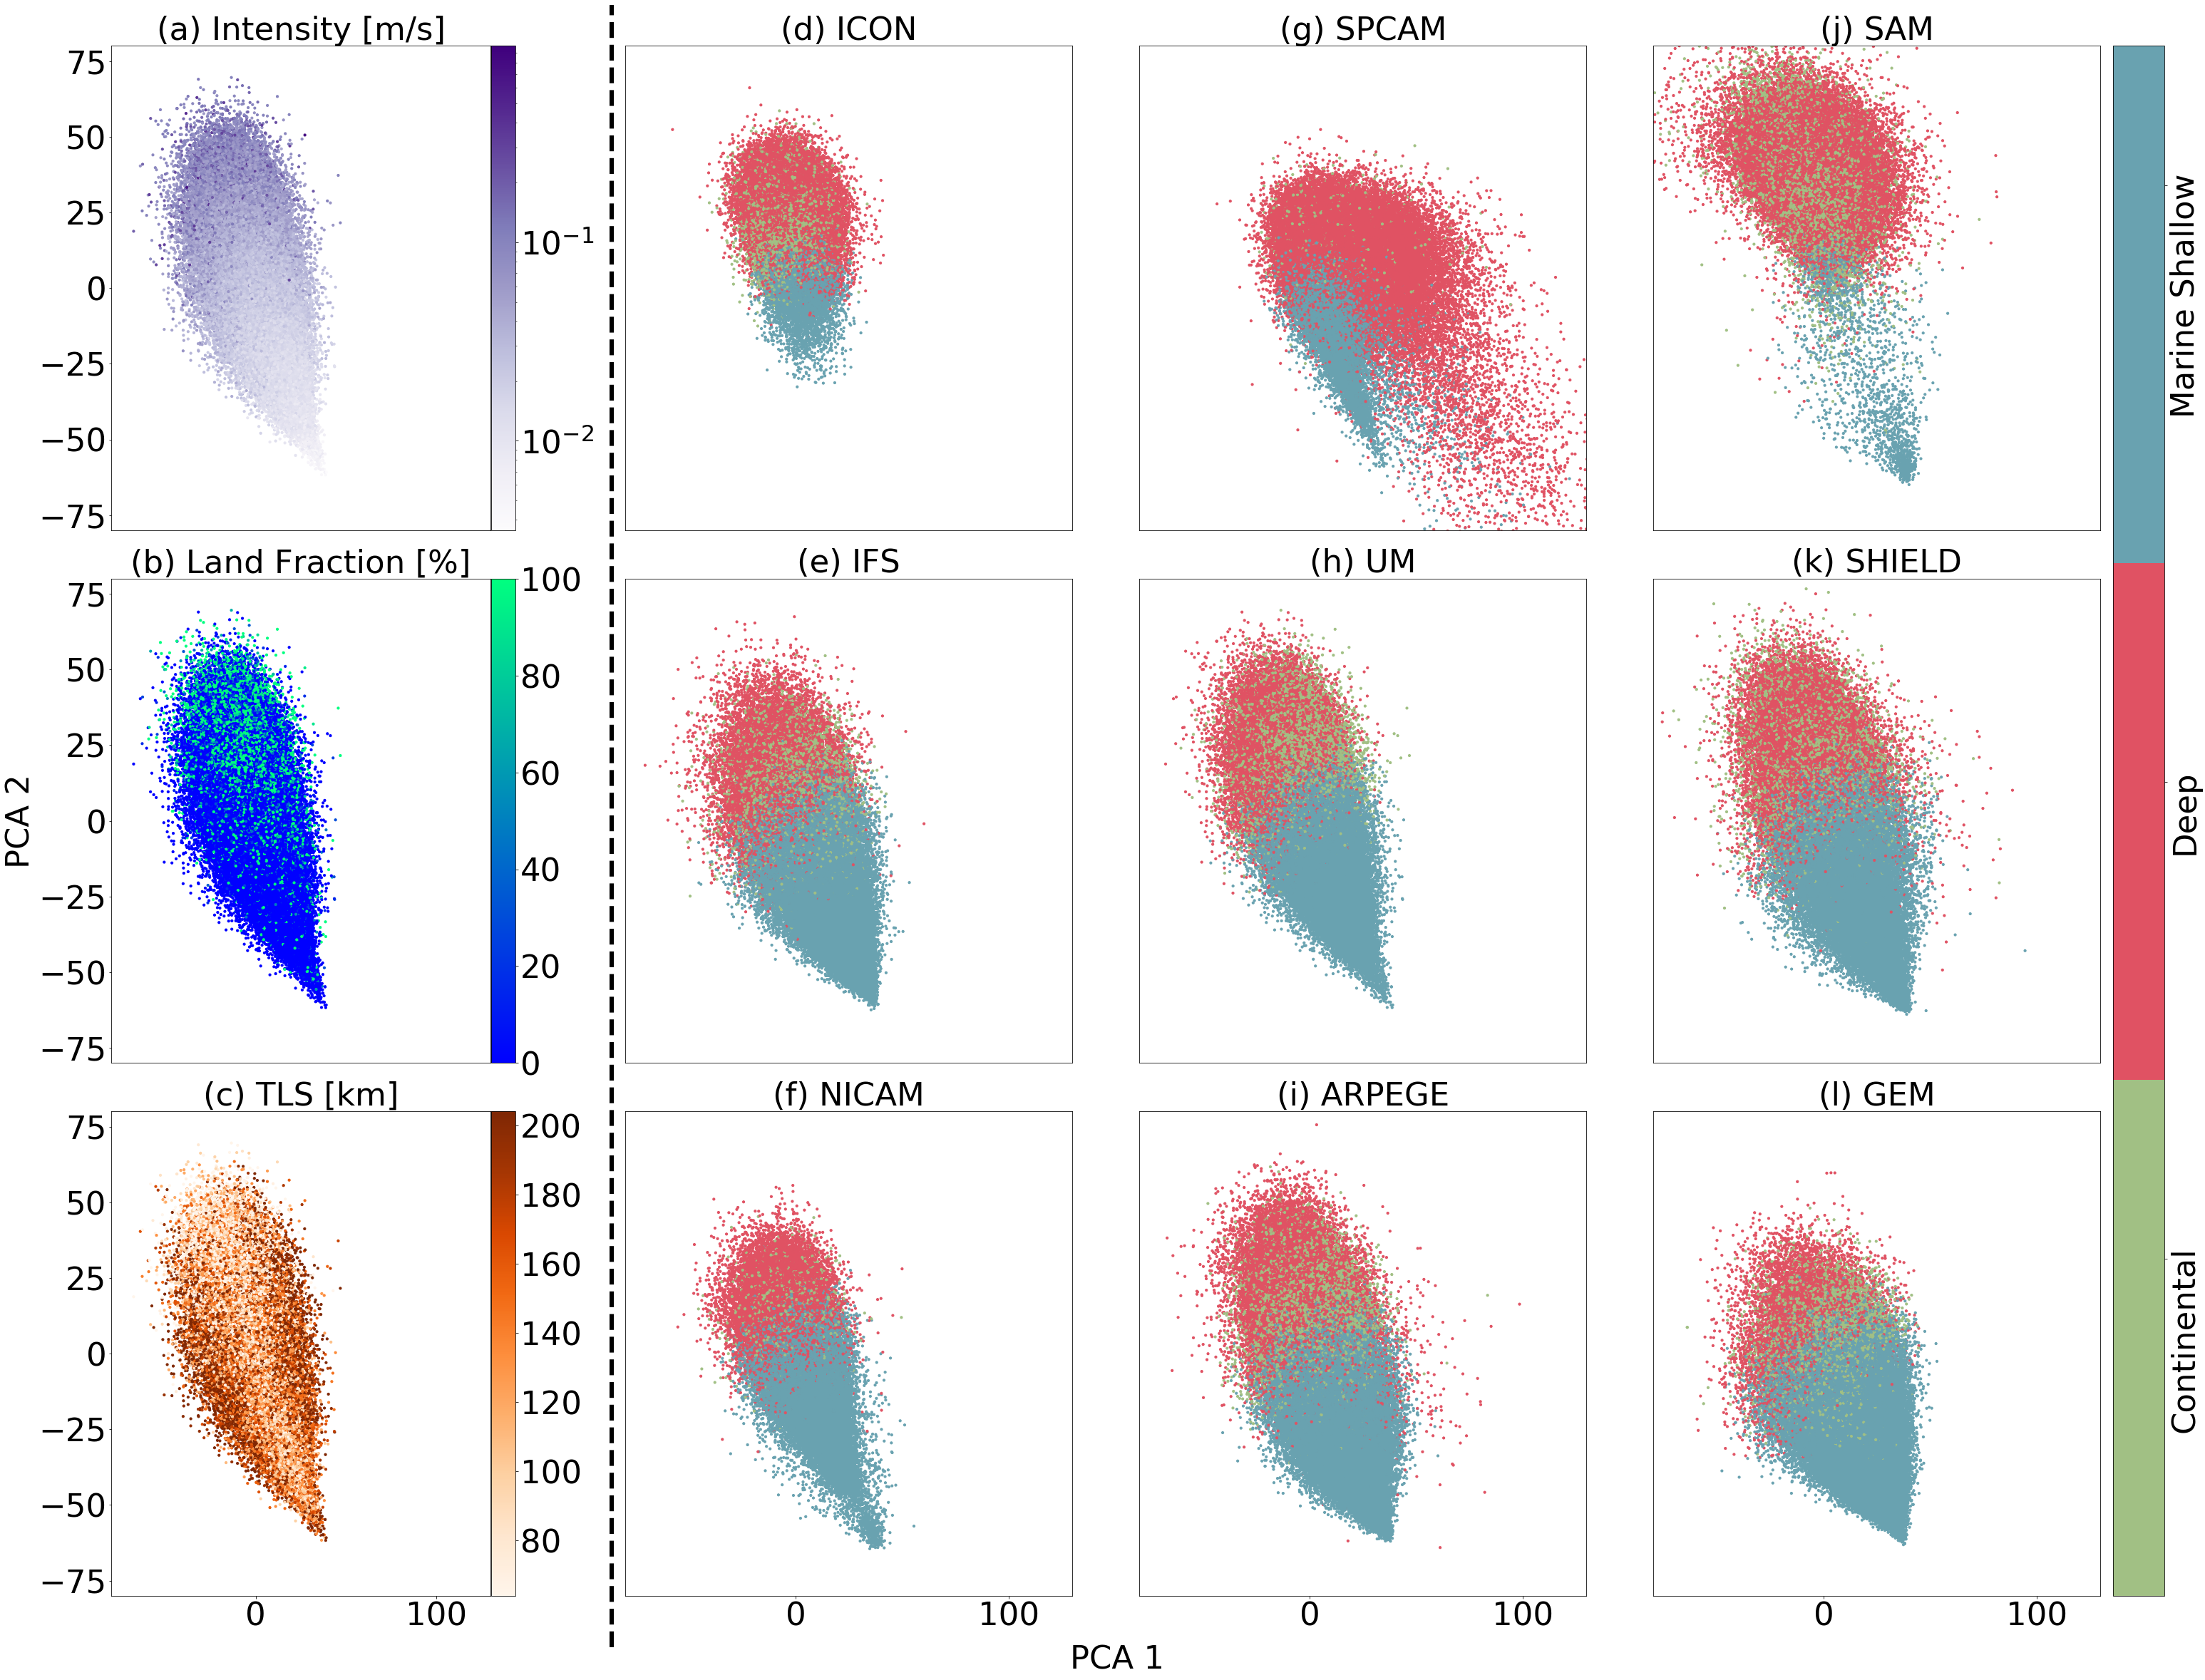

In [12]:
fig, ax = plt.subplots(3,4,figsize=(50,40))
cmap = matplotlib.colors.ListedColormap(["#A1C084","#E05263","#69A2B0"])
fz = 15*1.5

alpha_cluster = 1
alpha_land_frac = 1
alpha_tls = 1
alpha_tke = 1

ax1 = fig.add_subplot(ax[0,0])

cp = ax1.scatter(x=z_test_tsne_track_31_UM[:, 0], y=z_test_tsne_track_31_UM[:, 1], c=W_500_w_test_SAM, cmap="Purples", s=10.0, norm=matplotlib.colors.LogNorm(), alpha=alpha_tke)
ax1.set_title("(a) Intensity [m/s]", fontsize = fz*2, y = 1)

cbar = fig.colorbar(cp, pad=0.002)
cbar.set_alpha(1)
cbar.ax.tick_params(labelsize=fz*2)
ax1.tick_params(axis='y', which='major', labelsize=fz*2)
ax1.tick_params(axis='x', which='major', labelsize=fz*2)
ax1.set_xticks([])

ax1.set_xlim(-80,130)
ax1.set_ylim(-80,80)

ax2 = fig.add_subplot(ax[1,0])
vmin = 0
vmax = 1
cp = ax2.scatter(x=z_test_tsne_track_31_UM[:, 0], y=z_test_tsne_track_31_UM[:, 1], c=ifs_land_frac*100., cmap="winter", s=10.0, vmin=vmin*100, vmax=vmax*100, alpha=alpha_land_frac)
ax2.set_title("(b) Land Fraction [%]", fontsize = fz*2, y = 1)
ax2.tick_params(axis='y', which='major', labelsize=fz*2)
ax2.tick_params(axis='x', which='major', labelsize=fz*2)
ax2.set_xticks([])
ax2.set_ylabel("PCA 2", fontsize = fz*2)

ax2.set_xlim(-80,130)
ax2.set_ylim(-80,80)

cbar = fig.colorbar(cp, pad=0.002)
cbar.set_alpha(1)
cbar.ax.tick_params(labelsize=fz*2)
cbar.draw_all()

ax3_c = fig.add_subplot(ax[2,0])

vmin=2
vmax=256

cp = ax3_c.scatter(x=z_test_tsne_track_31_UM[:, 0], y=z_test_tsne_track_31_UM[:, 1], c=EQ_1_ww_test_SAM_profile*4, cmap="Oranges", s=10.0, vmin=16*4, vmax=51.0*4, alpha=alpha_tls)
ax3_c.set_title("(c) TLS [km]", fontsize = fz*2, y = 1)
ax3_c.tick_params(axis='y', which='major', labelsize=fz*2)
ax3_c.tick_params(axis='x', which='major', labelsize=fz*2)

ax3_c.set_xlim(-80,130)
ax3_c.set_ylim(-80,80)

cbar = fig.colorbar(cp, pad=0.002)
cbar.set_alpha(1)
cbar.ax.tick_params(labelsize=fz*2)
cbar.draw_all()

ax1=fig.add_subplot(ax[0,1])

cp = ax1.scatter(x=z_test_tsne_track_31_ICON[:, 0],  y=z_test_tsne_track_31_ICON[:, 1], c=labels_3_ICON, cmap=cmap, s=10.0, alpha=alpha_cluster)
ax1.set_title("(d) ICON", fontsize = fz*2, y = 1)

ax1.set_xlim(-80,130)
ax1.set_ylim(-80,80)
ax1.set_xticks([])
ax1.set_yticks([])

ax2=fig.add_subplot(ax[0,2])

cp = ax2.scatter(x=z_test_tsne_track_31_sam_origin[:, 0], y=z_test_tsne_track_31_sam_origin[:, 1], c=labels_3_original, cmap=cmap, s=10.0, alpha=alpha_cluster)
ax2.set_title("(g) SPCAM", fontsize = fz*2, y = 1)

ax2.set_xlim(-80,130)
ax2.set_ylim(-80,80)
ax2.set_xticks([])
ax2.set_yticks([])

ax3=fig.add_subplot(ax[0,3])

cp = ax3.scatter(x=z_test_tsne_track_31_sam[:, 0], y=z_test_tsne_track_31_sam[:, 1], c=labels_3_SAM, cmap=cmap, s=10.0, alpha=alpha_cluster)
ax3.set_title("(j) SAM", fontsize = fz*2, y = 1)

ax3.set_xlim(-80,130)
ax3.set_ylim(-80,80)
ax3.set_xticks([])
ax3.set_yticks([])

ax4=fig.add_subplot(ax[1,1])

cp = ax4.scatter(x=z_test_tsne_track_31_IFS[:, 0], y=z_test_tsne_track_31_IFS[:, 1], c=labels_3_IFS, cmap=cmap, s=10.0, alpha=alpha_cluster)
ax4.set_title("(e) IFS", fontsize = fz*2, y = 1)

ax4.set_xlim(-80,130)
ax4.set_ylim(-80,80)
ax4.set_xticks([])
ax4.set_yticks([])

ax5=fig.add_subplot(ax[1,2])

cp = ax5.scatter(x=z_test_tsne_track_31_UM[:, 0], y=z_test_tsne_track_31_UM[:, 1], c=labels_3_UM, cmap=cmap, s=10.0, alpha=alpha_cluster)
ax5.set_title("(h) UM", fontsize = fz*2, y = 1)

ax5.set_xlim(-80,130)
ax5.set_ylim(-80,80)
ax5.set_xticks([])
ax5.set_yticks([])

ax6=fig.add_subplot(ax[1,3])

cp = ax6.scatter(x=z_test_tsne_track_31_SHIELD[:, 0], y=z_test_tsne_track_31_SHIELD[:, 1], c=labels_3_SHIELD, cmap=cmap, s=10.0, alpha=alpha_cluster)
ax6.set_title("(k) SHIELD", fontsize = fz*2, y = 1)

ax6.set_xlim(-80,130)
ax6.set_ylim(-80,80)
ax6.set_xticks([])
ax6.set_yticks([])

ax7=fig.add_subplot(ax[2,1])

cp = ax7.scatter(x=z_test_tsne_track_31_NICAM[:, 0], y=z_test_tsne_track_31_NICAM[:, 1], c=labels_3_NICAM, cmap=cmap, s=10.0, alpha=alpha_cluster)
ax7.set_title("(f) NICAM", fontsize = fz*2, y = 1)

ax7.set_xlim(-80,130)
ax7.set_ylim(-80,80)
ax7.set_yticks([])
ax7.tick_params(axis='x', which='major', labelsize=fz*2)
ax7.set_xlabel("PCA 1", fontsize = fz*2)
ax7.xaxis.set_label_coords(1.1, -.1)

ax8=fig.add_subplot(ax[2,2])

cp = ax8.scatter(x=z_test_tsne_track_31_ARPEGE[:, 0], y=z_test_tsne_track_31_ARPEGE[:, 1], c=labels_3_ARPEGE, cmap=cmap, s=10.0, alpha=alpha_cluster)
ax8.set_title("(i) ARPEGE", fontsize = fz*2, y = 1)

ax8.set_xlim(-80,130)
ax8.set_ylim(-80,80)
ax8.set_yticks([])
ax8.tick_params(axis='x', which='major', labelsize=fz*2)

ax9=fig.add_subplot(ax[2,3])

cp = ax9.scatter(x=z_test_tsne_track_31_GEM[:, 0], y=z_test_tsne_track_31_GEM[:, 1], c=labels_3_GEM, cmap=cmap, s=10.0, alpha=alpha_cluster)
ax9.set_title("(l) GEM", fontsize = fz*2, y = 1)

ax9.set_xlim(-80,130)
ax9.set_ylim(-80,80)
ax9.set_yticks([])
ax9.tick_params(axis='x', which='major', labelsize=fz*2)

cbar_ax = fig.add_axes([0.905, 0.125, 0.02, 0.755])
cbar = fig.colorbar(cp, cax=cbar_ax, pad = 0.05, ticks=[0.435,1.05,1.82])
cbar.ax.set_yticklabels(["Continental","Deep","Marine Shallow"],  fontsize=fz*2, rotation=90) 
cbar.solids.set(alpha=1)

line = plt.Line2D((.32,.32),(.1,.9), color="k", linewidth=6, linestyle="dashed")
fig.add_artist(line)

plt.subplots_adjust(wspace=0.15, hspace=0.1)
plt.savefig("../Figures/Figure_2.png", bbox_inches='tight', pad_inches = 0.1)